# Import necessary module

In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta, timezone
from timeframe_histogram import plot_histogram
from timeframe_histogram import plot_timestamp_vline
from timeframe_histogram import plot_metrics_1
import matplotlib.pyplot as plt
import pytz
import pandasql as ps

# create the dataframe

In [90]:
frames = []
Date_list =  ['20240806','20240807']

for Date in Date_list:
        long_data = pd.read_csv('metric_%s.csv'%(Date))
        frames.append(long_data)
    
df = pd.concat(frames)

In [91]:
# df = long_data = pd.read_csv('metric_ap-southeast-1_20240806.csv')


df['response_fbl_ms'] = df['response_fbl']*1000
# df['ns'] = df_sort['datetime'].dt.values.astype('int64') // 10**9
# df_sort['datetime_timestamp'] = df_sort['datetime'].apply(lambda x: x.timestamp())
# df = df.set_index('timestamp')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29091729 entries, 0 to 10000034
Data columns (total 5 columns):
 #   Column           Dtype  
---  ------           -----  
 0   date             int64  
 1   hour             int64  
 2   timestamp        object 
 3   response_fbl     float64
 4   response_fbl_ms  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.3+ GB


In [92]:
df.head()

,date,hour,timestamp,response_fbl,response_fbl_ms
0,20240806,13,2024-08-06 13:25:08.661,0.003,3.0
1,20240806,13,2024-08-06 13:25:08.846,0.106,106.0
2,20240806,13,2024-08-06 13:25:09.049,0.002,2.0
3,20240806,13,2024-08-06 13:25:09.210,0.003,3.0
4,20240806,13,2024-08-06 13:50:43.556,0.090,90.0


# Create Histogram

In [ ]:
hour_1 = '00'
hour_2 = '17'
date = '20240806'




result_1 = ps.sqldf(
    "select response_fbl_ms \
    from df where date = '%s' and hour = '%s' " %(date,hour_1)
)
result_2 = ps.sqldf(
    "select response_fbl_ms \
    from df where date = '%s' and hour = '%s' " %(date,hour_2)
)


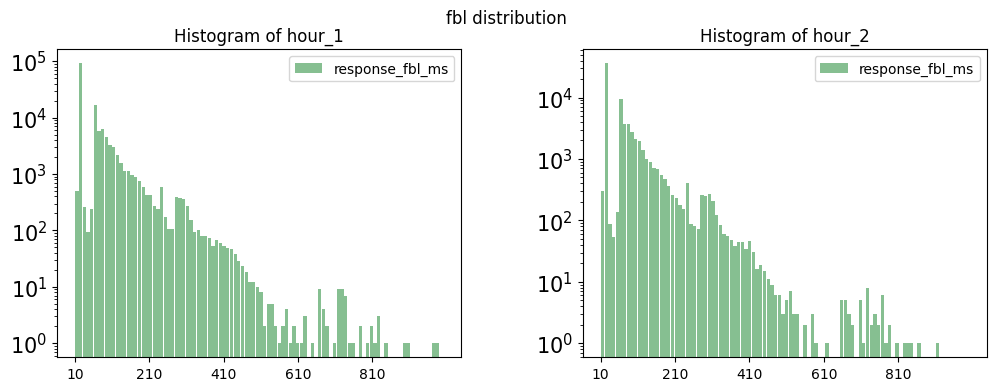

In [97]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
fig.suptitle('fbl distribution')
result_1.hist(ax=ax1,bins=100, grid=False, color='#86bf91', zorder=2, rwidth=0.9, range=[10,1000],xlabelsize=10,ylabelsize=15,legend='true',log=True)
ax1.set_title('Histogram of hour_1')
ax1.set_xticks(range(10, 1000, 200))
result_2.hist(ax=ax2,bins=100, grid=False, color='#86bf91', zorder=2, rwidth=0.9, range=[10,1000],xlabelsize=10,ylabelsize=15,legend='true',log=True)
ax2.set_title('Histogram of hour_2')
ax2.set_xticks(range(10, 1000, 200))


# result.hist(bins=100, grid=False, figsize=(20,10), color='#86bf91', zorder=2, rwidth=0.9, range=[0,1000],xlabelsize=10,ylabelsize=15,legend='true',weights=np.ones(len(result)) / len(result))
# result.hist(bins=100, grid=False, figsize=(20,10), color='#86bf91', zorder=2, rwidth=0.9, range=[0,1000],xlabelsize=10,ylabelsize=15,legend='true',log=True)
# plt.xticks(range(0, 1000, 20))
# plt.title('fbl distribution')

# Create TimeFrame Histogram

/Users/yemingcn/Desktop/my_code/timeframe_histogram/v1/.venv/lib/python3.12/site-packages/pandas/core/groupby/grouper.py:381: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  ax = Index(obj[key], name=key)


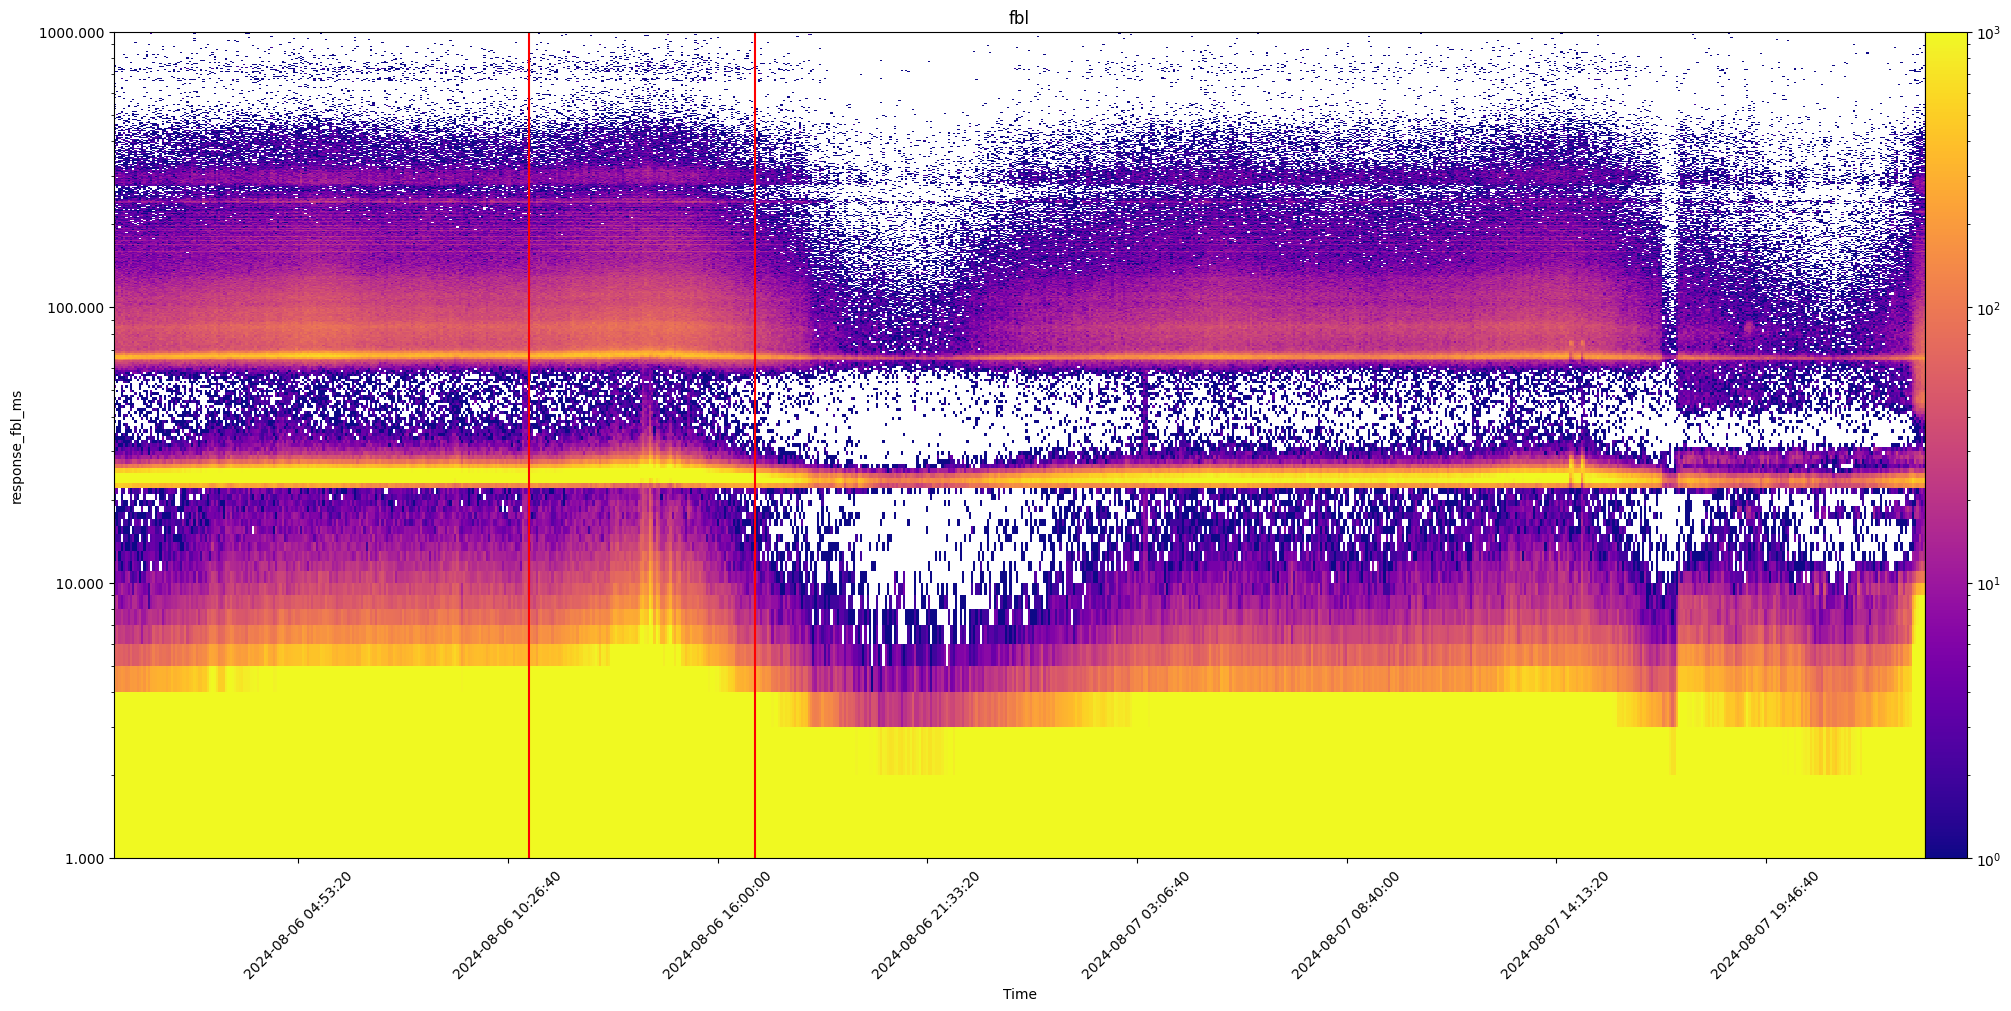

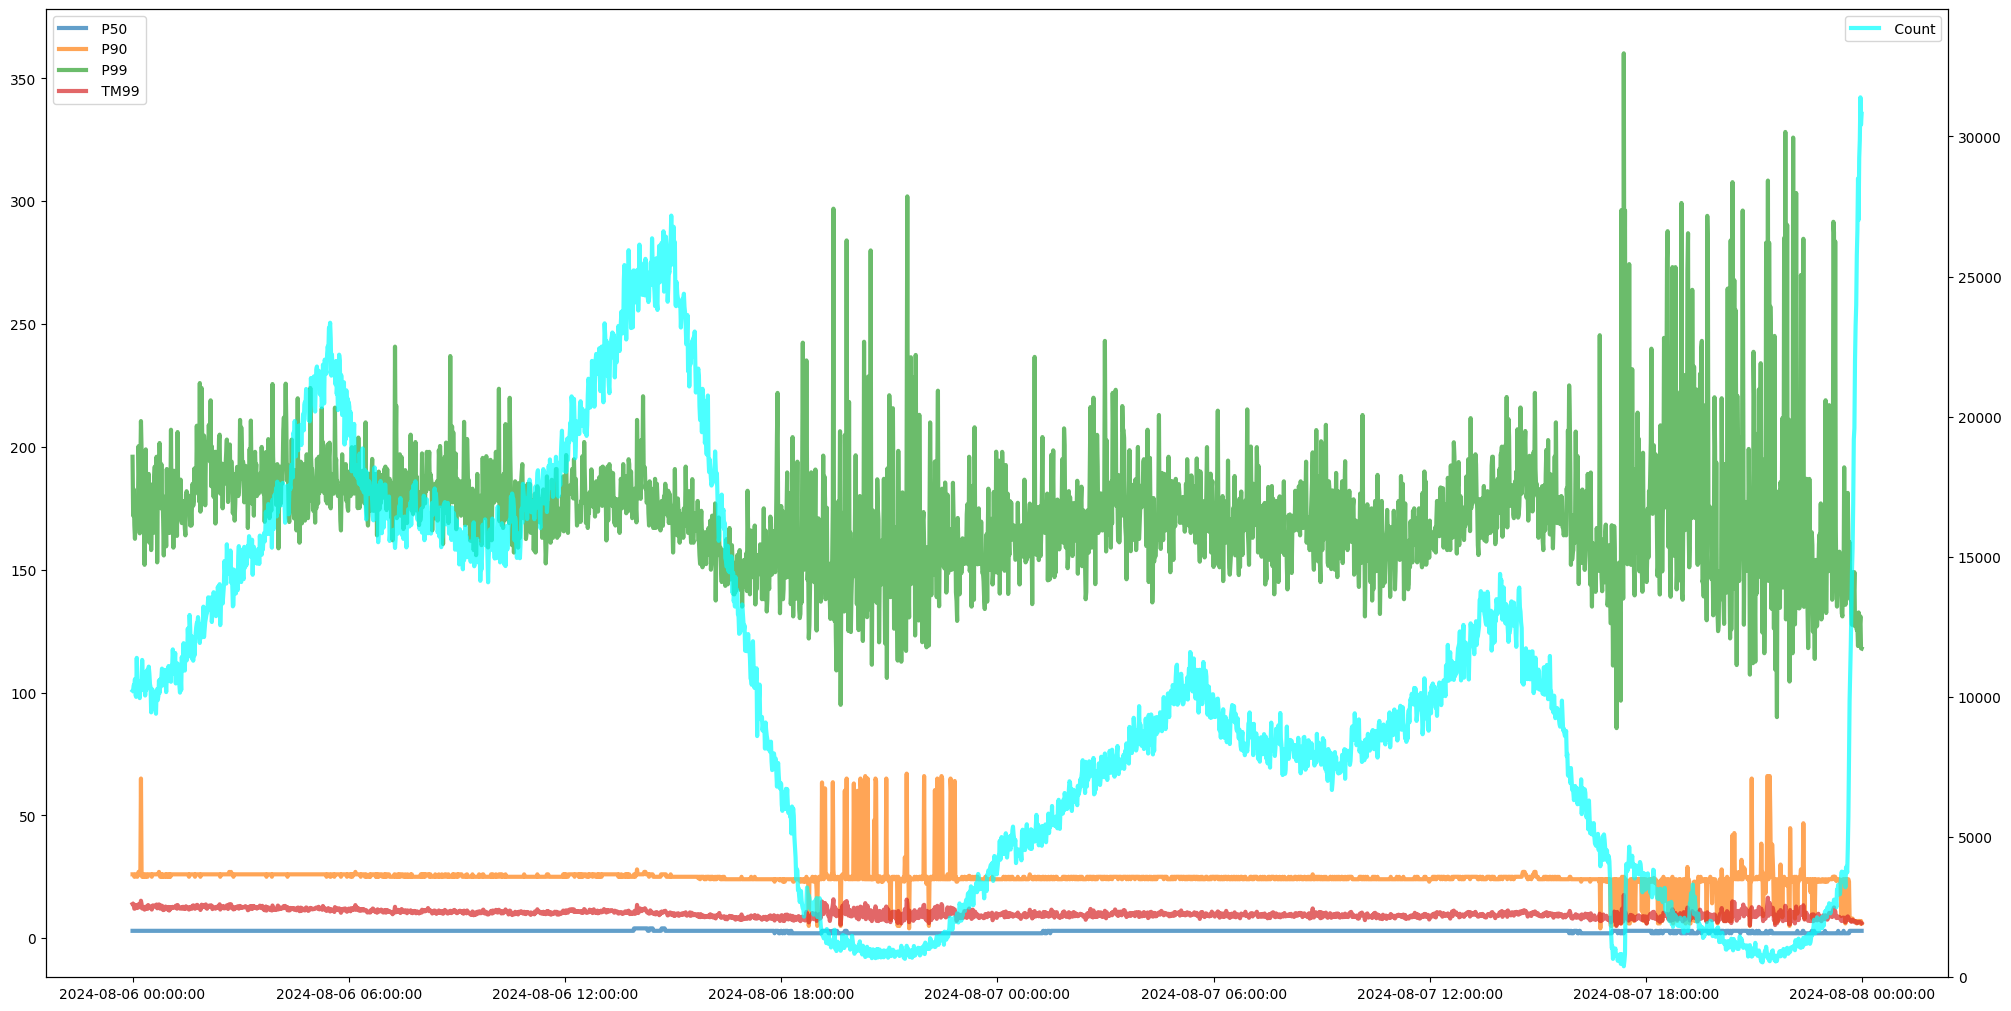

In [93]:
vline_begin = '2024-08-06 11:00:00'
vline_end = '2024-08-06 16:59:59'

title = 'fbl'
metric = 'response_fbl_ms'

fig, subplots = plt.subplots(nrows=1,ncols=1,figsize=(20,10), constrained_layout=True)
ax = subplots

plot_histogram(fig, ax, df, title, metric, ylim=[1,1000],datetime_field = "timestamp")

plot_timestamp_vline(ax, vline_begin)
plot_timestamp_vline(ax, vline_end)


fig2, subplots2 = plt.subplots(nrows=1,ncols=1,figsize=(20,10), constrained_layout=True)
ax2 = subplots2
plot_metrics_1(ax2, df, metric, resample_size='1min', stats=["P50", "P90", "P99", "TM99", "n"], datetime_field = "timestamp")

# plot_metrics_1(ax, df, metric, resample_size='1min', stats=["P50", "P90", "P99", "TM99", "n"],datetime_field='DateTime')
# plot_metrics_1(ax, df, metric, resample_size='1min', stats=["n"])